In [1]:
# ASTR 400 B 
# In Class Lab 2

# Import Modules 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import quad # For integration
# Documentation and examples for quad : 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html
# https://www.tutorialspoint.com/scipy/scipy_integrate.htm

## Part A:  Schechter Fxn

The galaxy luminosity function in the nearby universe is well described by a Schechter Function:

\begin{equation}
\Phi(M)dM = ( 0.4 \, ln10 ) \, \phi_\ast \, 10^{0.4(M_\ast - M)(\alpha +1)} e^{-10^{0.4(M_\ast - M)}} dM
\end{equation}

With the following parameters from Smith+2009 for Field Galaxies in SDSS at z$\sim$0.1 in the Kband:


 $\phi_\ast$ =1.66 $  \times 10^{-2}$  $h^3$ Mpc$^{-3}$

 $\alpha$ =  -0.81 


  M$_\ast$ =  M$_k^\ast$= -23.19  - 5*log($h$)
  
 $h$ = the Hubble constant in units of 100 km/s/Mpc . At z=0 this is 0.7. But we are going to se $h$=1 here. Units will then be in "comoving" coordinates.
  
  This function is defined for you below:

In [2]:
def schechter_M(m,phi_star=0.0166,m_star=-23.19,alpha=-0.81):
    """ Function that computes the Schechter Luminosity Function for a given magnitude, 
    assuming default parameters for field galaxies in SDSS at z~0.1 in the Kband (Smith+2009)
    
    Inputs
        m : an array of floats
            an array of Kband magnitudes  (assumes -5*log(h) implicitly)
        phi_star:  float
            normalization of Schechter fxn (h^3 Mpc^-3)
        m_star:  float 
            knee of the Schechter fxn (K-band magnitude, assumes -5*log(h) implicitly)
        alpha:  float
            faint end slope of the Schechter fxn
    
    Output:
        schechterM: float
            number density of galaxies (comoving units) at the given magnitude m - 5*log(h)
            

    """

# You should divide up long functions instead of writing them out as one long set
    a = 0.4*np.log(10)*phi_star # Grouping all constants together
    b = 10**(0.4*(m_star-m)*(alpha+1.0)) # The Power Law, controlling the faint end slope
    c = np.exp(-10**(0.4*(m_star-m))) # The Exponential controlling the high mass end behavior
    schechterM = a*b*c # schechter function for the given magnitude
# i.e. don't do the below
#    return 0.4*np.log(10)*phistar*10**(0.4*(Mstar - M)*(alpha +1.0))*np.exp(-10**(0.4*(Mstar - M)))

    return schechterM

# Q1 

Utilizing the defined function, plot the Schechter Function using the above parameter values over a magnitude range of -17 to -26. 
Try to reproduce the black solid line in Smith+2009 MNRAS 397,868 [UKIDSS Survey] Figure below.


![Smith](./Smith09.png)

# Q2 

Galaxies in the Virgo Cluster have different parameters, like $\alpha$=-1.35  (Ferrarese+2016 ApJ 824).

Overplot the Schechter Function with this new value of $\alpha$.  

Try a smaller value of $\alpha = -0.6$.

How does the function change?  What does this mean? 


In [3]:
# Create an array to store Kband Magnitudes from -26 to -17

mK=np.arange(-26, -16.9, 0.1)
print(mK[2])

-25.799999999999997


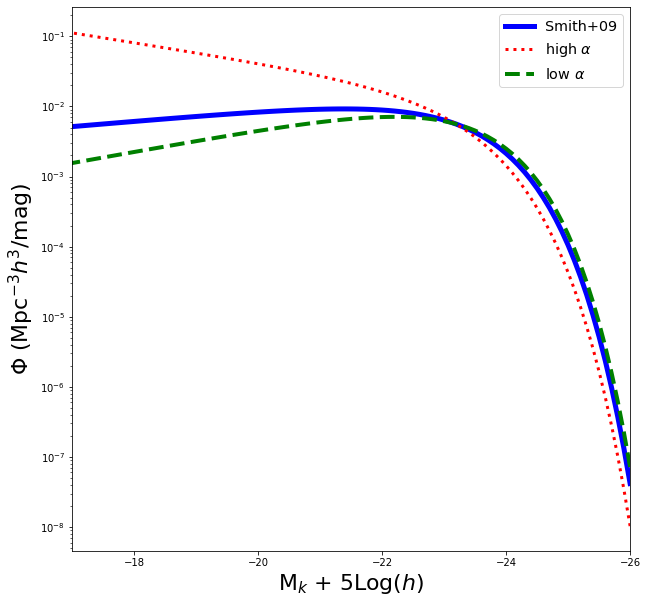

In [4]:
# Plot the Schechter Function

fig = plt.figure(figsize=(10,10))  # sets the scale of the figure
ax = plt.subplot(111) 

# Plot the default values (y axis log)
# ADD HERE
ax.semilogy(mK, schechter_M(mK), color="blue", linewidth=5, label='Smith+09')

# Q2 solutions: change alpha
# ADD HERE
ax.semilogy(mK, schechter_M(mK, alpha=-1.35), color="red", linestyle=":",
            linewidth=3, label=r'high $\alpha$')
ax.semilogy(mK, schechter_M(mK, alpha=-0.6), color="green", linestyle="--",
            linewidth=4, label=r'low $\alpha$')

# Add labels
plt.xlabel(r'M$_k$ + 5Log($h$)', fontsize=22)
plt.ylabel(r'$\Phi$ (Mpc$^{-3}h^3$/mag)', fontsize=22)

#set axis limits
plt.xlim(-17,-26)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

# Save to a file
#plt.savefig('Schechter_M.png')



# Q3

Build a function to compute the Schechter Function in terms of luminosity.

Use `quad` to numerically integrate the function to compute the fraction of the luminosity that lies above L* in the following three cases:  

$\alpha$=-0.7 (default), $\alpha$=-0.6, $\alpha$=-1.85. 


Schecheter Function $\Phi(L) = \frac{n_\ast}{L_\ast} (\frac{L}{L_\ast})  ^{\alpha}  e^{-L/L_\ast}$

$n_\ast$ = 0.008  $h^3$ Mpc$^{-3}$

$L_\star = 1.4 \times 10^{10} L_\odot$

In [5]:
def schechter_L(lum, n_star = 8e-3, l_star = 1.4e10, alpha = -0.7):
    """This is a function that computes the schechter luminosity fuction for a given luminosity.
        Defaults are from Spake & Gallagher.
        
        Inputs:
            lum: array of floats
                Array of luminosities (Lsun)
                
            n_star: float
                Normalization of schechter function (h^3 Mpc^-3)
                
            l_star: float
                Characteristic luminosity (knee of Schechter function) in units of Lsun
                
            alphs: float
                Faint and slope
                
        Outputs:
            schechter_l: float
                number density of galaxies for a given luminosity (h^3 * Mpc^-3/Lsun)
    """
    
    # Break down the equation inot parts
    a = (lum/l_star)**alpha # Faint end
    b = np.exp(-lum/l_star) # Bright end
    c = n_star/l_star # Constants
    
    schechter_l = a*b*c
    
    return schechter_l

In [6]:
# Understanding lambda functions
# Short cut -- defines and evaluates a function in one line ! 

# lambda says that a function follows, where the variables are a and b, and the function to be evaluated is a*b
x = lambda a, b : a * b
print(x(5, 6))

30


In [7]:
# Example Usage of quad and lambda

print(quad(np.sin, 0, np.pi)) # example: integrate sine function from 0 to pi


f = lambda x: np.sin(x)
print(quad(f, 0, np.pi))
# first element quad is the integral, second element is the error


def ex(x):
    return np.sin(x) 

print(quad(lambda x: ex(x), 0, np.pi))



(2.0, 2.220446049250313e-14)
(2.0, 2.220446049250313e-14)
(2.0, 2.220446049250313e-14)


In [13]:
# What fraction of the integrated luminosity density lies above l*
# Alpha = -0.7

l_upper =  quad(lambda L: L*schechter_L(L), 1.4e10, 1e14)
print(l_upper)

l_total = quad(lambda L: L*schechter_L(L), 0.1, 1e14)

print("Flux Ratio (>L*)/L_total", np.around((l_upper[0]/l_total[0]), 3))

(49678654.46727106, 0.00015538573934481548)
Flux Ratio (>L*)/L_total 0.494


In [14]:
# What fraction of the integrated luminosity density lies above l*
# Alpha = -1

l_upper1 =  quad(lambda L: L*schechter_L(L, alpha=-1), 1.4e10, 1e14)
print(l_upper)

l_total1 = quad(lambda L: L*schechter_L(L, alpha=-1), 0.1, 1e14)

print("Flux Ratio (>L*)/L_total", np.around((l_upper1[0]/l_total1[0]), 3))

(49678654.46727106, 0.00015538573934481548)
Flux Ratio (>L*)/L_total 0.368


In [16]:
# What fraction of the integrated luminosity density lies above l*
# Alpha = -1.85

l_upper2 =  quad(lambda L: L*schechter_L(L, alpha=-1.85), 1.4e10, 1e14)
print(l_upper)

l_total2 = quad(lambda L: L*schechter_L(L, alpha=-1.85), 0.1, 1e14)

print("Flux Ratio (>L*)/L_total", np.around((l_upper2[0]/l_total2[0]), 3))

(49678654.46727106, 0.00015538573934481548)
Flux Ratio (>L*)/L_total 0.038


## Part B: IMF 

Create a function called `Salpeter` that defines the Salpeter IMF: 

\begin{equation}
\xi(M) = \xi_0 (M/M_\odot)^{-\alpha}
\end{equation}

$\alpha = 2.35$
The function should take as input an array of stellar masses, M. 
You will need to determine the normalization, $\xi_0$, by integrating this equation over mass from 0.1 to 120 M$_\odot$
and setting the value to 1.  The function should then return $\xi(M)$, which will now represent the fractional number of stars. 

Integration:

`quad(lambda x:  fxn(x),xmin,xmax)`

quad returns an array with 2 values. you want the first value. 
Note I've used a "lambda" expression.   Python's lambda expressions allow a function to be created and passed around all in one line of code

In [20]:


def Salpeter(m, m_min=0.1, m_max=120, alpha = 2.35):
    """ This is a function that defines the salpeter IMF. The function is normalized such that
        it returns the fraction of stars expected at the given mass array, m 
        (assuming stars range in mass from m_min to m_max)
        
        Inputs:
            m: 'array of floats'
                array of stellar masses (in Msun)
            
            m_min : 'float'
                minimum mass (Msun)
            
            m_max: 'float'
                maximum mass (Msun)
            
            apha: 'float'
                power law for Salpeter function    
        
        Outputs:
            norm_salpeter: 'float'
                normalized fraction of stars at a given mass array, m
    """
    
    # determine the magnitude of the integral
    to_normalized = quad(lambda m: m**(-alpha), m_min, m_max)
    
    # determine the normalization factor
    norm = 1/to_normalized[0]
    
    # return normalized salpeter IMF
    norm_salpeter = norm*m**(-alpha)
    
    return norm_salpeter

## Q1: 
Double Check: if you integrate your function from 0.1 to 120 you should return 1.0 


In [25]:
test = quad(lambda m: Salpeter(m), 0.1, 120)
print(np.round(test[0], 3))

1.0


## Q2: 
Integrate your normalized function to compute the fraction of stars with stellar masses greater than the sun and less 
than 120 M$_\odot$.

In [26]:
frac = quad(lambda m: Salpeter(m), 1, 120)
print(np.round(frac[0], 3))

0.045


In [27]:
# cluster with 5000 stars
5000*np.round(frac[0], 3)

225.0

## Q3:

How might you modify the above to return the fraction of MASS ? instead of fraction of the total numbers of stars.

In [32]:
def Salpeter_mass(m, m_min=0.1, m_max=120, alpha = 2.35):
    """ This is a function that defines the salpeter IMF. The function is normalized such that
        it returns the fraction of mass (assuming stars range in mass from m_min to m_max)
        
        Inputs:
            m: 'array of floats'
                array of stellar masses (in Msun)
            
            m_min : 'float'
                minimum mass (Msun)
            
            m_max: 'float'
                maximum mass (Msun)
            
            apha: 'float'
                power law for Salpeter function    
        
        Outputs:
            norm_salpeter: 'float'
                normalized fraction of mass over a given range, m
    """
    
    # determine the magnitude of the integral
    to_normalized = quad(lambda m: m*m**(-alpha), m_min, m_max)
    
    # determine the normalization factor
    norm = 1/to_normalized[0]
    
    # return normalized salpeter IMF
    norm_salpeter = norm*m*m**(-alpha)
    
    return norm_salpeter

In [34]:
# determine the fraction of mass of stars that are more massive than the Sun

frac_mass = quad(lambda m: Salpeter_mass(m), 1, 120)
print(np.round(frac_mass[0], 3))

0.396


In [35]:
# 5000 Msun cluster
print(5000*np.round(frac_mass[0], 3))

1980.0


In [36]:
# 100 Msun cluster
print(100*np.round(frac_mass[0], 3))

39.6
